# ML Final Project Report

##  Data Pre-Processing & Basic Exploration

In [1]:
# Import libraries

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [4]:
# Import dataset

df = pd.read_csv('Churn_Modelling.csv')
df 

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


### Data Cleaning

In [5]:
df.rename(columns={"Prod Number": "ProdNumber"}, inplace = True)
df.head(2)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,ProdNumber,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


<b> Null Values </b>

In [6]:
df_null = df[df.isna().any(axis=1)]
df_null

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,ProdNumber,HasCrCard,ActMem,EstimatedSalary,Exited
6,15592531,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
10,15767821,528,France,Male,NaN,6,102016.72,2,0,0,80181.12,0
11,15737173,497,Spain,Male,NaN,3,0.00,2,1,0,76390.01,0
12,15632264,476,France,Female,NaN,10,0.00,2,1,0,26260.98,0
37,15729599,804,Spain,Male,NaN,7,76548.60,1,0,1,98453.45,0
38,15717426,850,France,Male,NaN,7,0.00,1,1,1,40812.90,0
39,15585768,582,Germany,Male,NaN,6,70349.48,2,0,1,178074.04,0
74,15770811,519,France,Male,36.0,9,0.00,2,0,1,NaN,0
77,15662085,678,France,Female,32.0,9,0.00,1,1,1,NaN,0
87,15625759,729,France,Male,30.0,9,0.00,2,1,0,NaN,0


D:\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


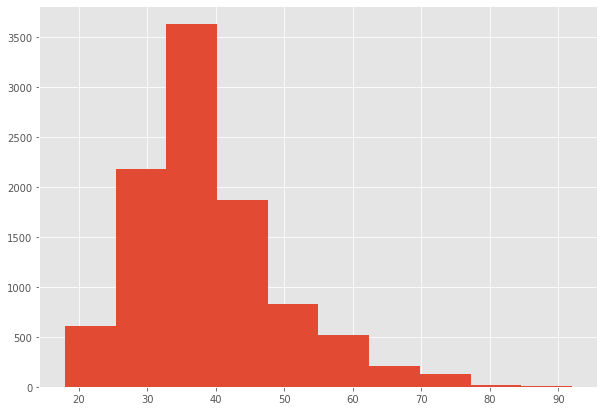

In [7]:
# Age

plt.style.use("ggplot",)
plt.figure(figsize = (10,7))
plt.hist(x = df['Age']);

In [8]:
# Gender 

df.Gender.value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

(950, 1040)

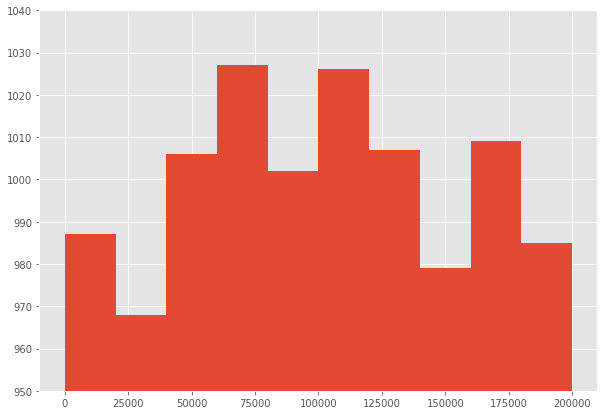

In [9]:
# EstimatedSalary

plt.figure(figsize = (10,7))
plt.hist(x = df['EstimatedSalary'])
plt.ylim(950, 1040)

In [10]:
# Replacing null values in Age with the median age (as the ages are a little skewed)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replacing null values in Gender with the 'Male' gender as there is a higher frequency.
df['Gender'] = df['Gender'].fillna('Male')

# Replacing null values in EstimatedSalary with the mean. 
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [11]:
df_null = df[df.isna().any(axis=1)]
df_null.count()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
ProdNumber         0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

<b> Duplicated Values </b>

In [12]:
df_dup = df[df.duplicated()]
df_dup.count()

# There are no duplicated values. 

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
ProdNumber         0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

<b> Outliers </b>

Present in the CredRate, Age, and ProdNumber features. 

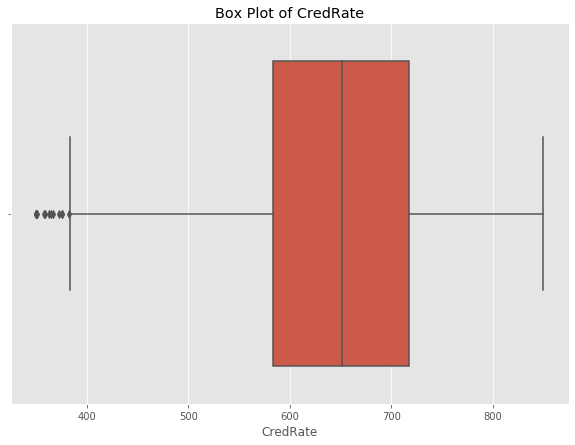

In [13]:
plt.figure(figsize = (10,7))

sns.boxplot(x = df['CredRate'])

plt.title('Box Plot of CredRate')
plt.xlabel('CredRate')
plt.show()

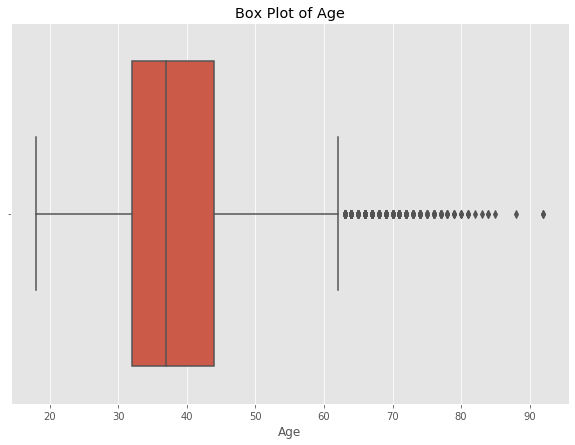

In [14]:
plt.figure(figsize = (10,7))

sns.boxplot(x = df['Age'])

plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

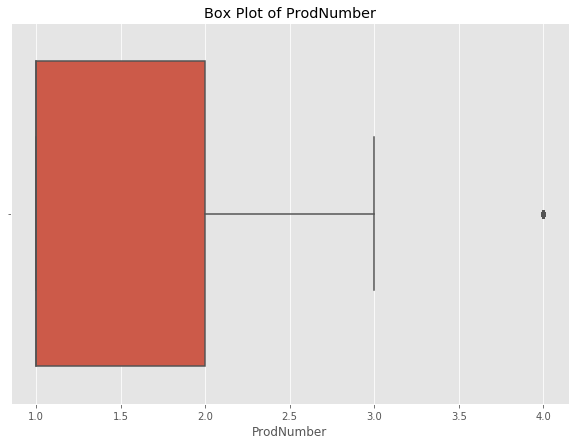

In [15]:
plt.figure(figsize = (10,7))

sns.boxplot(x = df['ProdNumber'])

plt.title('Box Plot of ProdNumber')
plt.xlabel('ProdNumber')
plt.show()

In [16]:
# plt.figure(figsize = (10,7))

# sns.boxplot(x = df['EstimatedSalary'])

# plt.title('Box Plot of EstimatedSalary')
# plt.xlabel('EstimatedSalary')
# plt.show()

In [17]:
# plt.figure(figsize = (10,7))

# sns.boxplot(x = df['Balance'])

# plt.title('Box Plot of Balance')
# plt.xlabel('Balance')
# plt.show()

In [18]:
# plt.figure(figsize = (10,7))

# sns.boxplot(x = df['Tenure'])

# plt.title('Box Plot of Tenure')
# plt.xlabel('Tenure')
# plt.show()

### Feature Engineering and Basic Data Visualisation

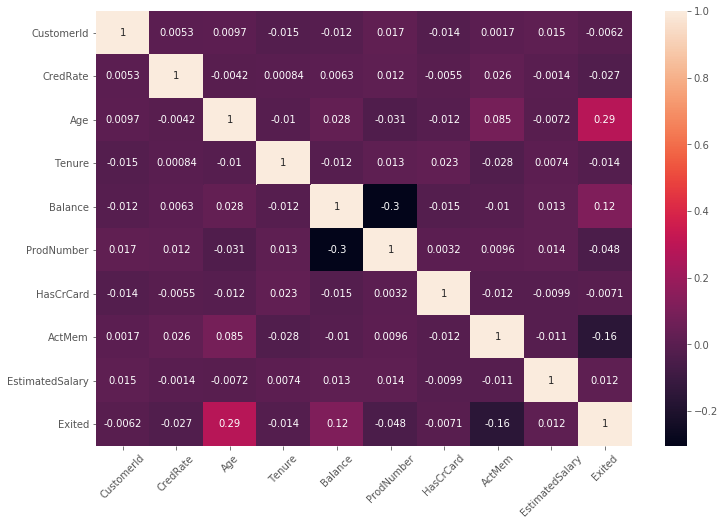

In [19]:
# Summoning a heatmap to see the basic correlation of the features, and to check for multicollinearity at the same time. 

df_corr = df.corr()

plt.subplots(figsize = (12,8))
sns.heatmap(df_corr, annot = True)
plt.xticks(rotation=45);

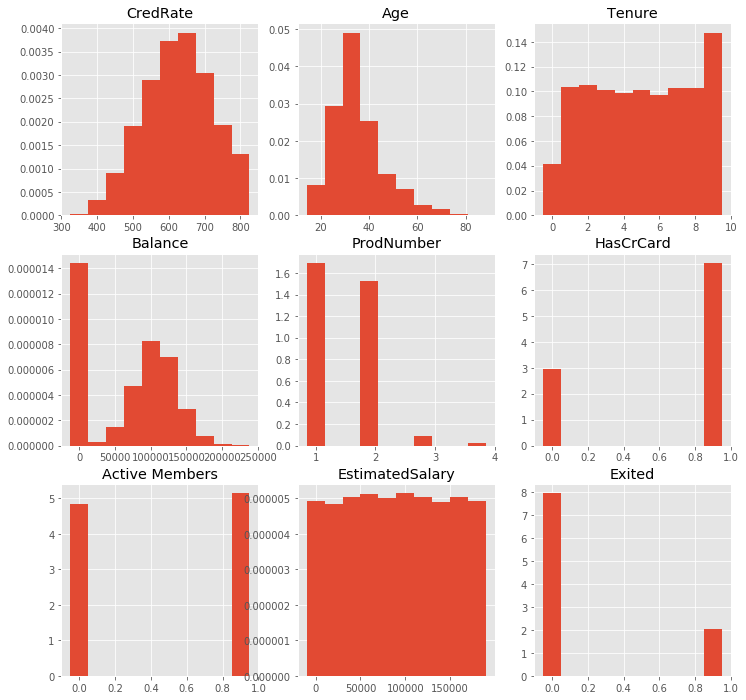

In [20]:
# Summoned histograms of the different features to get a rough idea about the distribution of the different features.

fig, axs = plt.subplots(3, 3, figsize = (12,12))
axs[0, 0].hist(df.CredRate, align = "left", rwidth = 1, density = True)
axs[0, 0].title.set_text('CredRate')
axs[0, 1].hist(df.Age, align = "left", rwidth = 1, density = True)
axs[0, 1].title.set_text('Age')
axs[0, 2].hist(df.Tenure, align = "left", rwidth = 1, density = True)
axs[0, 2].title.set_text('Tenure')

axs[1, 0].hist(df.Balance, align = "left", rwidth = 1, density = True)
axs[1, 0].title.set_text('Balance')
axs[1, 1].hist(df.ProdNumber, align = "left", rwidth = 1, density = True)
axs[1, 1].title.set_text('ProdNumber')
axs[1, 2].hist(df.HasCrCard, align = "left", rwidth = 1, density = True)
axs[1, 2].title.set_text('HasCrCard')

axs[2, 0].hist(df.ActMem, align = "left", rwidth = 1, density = True)
axs[2, 0].title.set_text('Active Members')
axs[2, 1].hist(df.EstimatedSalary, align = "left", rwidth = 1, density = True)
axs[2, 1].title.set_text('EstimatedSalary')
axs[2, 2].hist(df.Exited, align = "left", rwidth = 1, density = True)
axs[2, 2].title.set_text('Exited')

plt.show()

### Feature Engineering

<b> One-Hot Encoding </b>

For Geography and Gender features, we need to encode them into categorical data, and as there's no better country or gender, we'll go with One-Hot Encoding.

In [21]:
df.dtypes

CustomerId           int64
CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
ProdNumber           int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df.Geography.values

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [25]:
onehotencoder = OneHotEncoder()

geo_val = df.Geography.values.reshape(-1,1)
geo_encoded = onehotencoder.fit_transform(geo_val).toarray()

dfgeo_encoded = pd.DataFrame(geo_encoded, columns = ['France', 'Spain', 'Germany'])
dfgeo_encoded

,France,Spain,Germany
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [26]:
gen_val = df.Gender.values.reshape(-1,1)

gen_encoded = onehotencoder.fit_transform(gen_val).toarray()

dfgen_encoded = pd.DataFrame(gen_encoded, columns = ['Female', 'Male'])

dfgen_encoded

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,0.0,1.0
9997,1.0,0.0
9998,0.0,1.0


In [27]:
df = pd.concat([df, dfgeo_encoded, dfgen_encoded], axis=1)
df.head(3)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,ProdNumber,HasCrCard,ActMem,EstimatedSalary,Exited,France,Spain,Germany,Female,Male
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0


In [28]:
df.drop(['Geography', 'Gender', 'CustomerId'], axis = 1, inplace = True)

In [29]:
df.head(3)

,CredRate,Age,Tenure,Balance,ProdNumber,HasCrCard,ActMem,EstimatedSalary,Exited,France,Spain,Germany,Female,Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0


### Split Train-Test Data Sets

In [30]:
target = df.Exited.values
features = df.drop(['Exited'], axis = 1)

In [31]:
features.head(3)

,CredRate,Age,Tenure,Balance,ProdNumber,HasCrCard,ActMem,EstimatedSalary,France,Spain,Germany,Female,Male
0,619,42.0,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41.0,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42.0,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, random_state = 15)

In [33]:
X_train.shape

(7500, 13)

In [34]:
X_test.shape

(2500, 13)

### Feature Scaling

In [35]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3) Machine Learning Model Training and Testing

### Classification Model Selection

#### Model 1: Random Forest Train-Test

In [36]:
rf_classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 15) 

rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [37]:
rf_Y_pred = rf_classifier.predict(X_test)

#### Model 1: Random Forest Evaluation 

<i>GridSearchCV</i>

In [38]:
df.Exited.value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

In [39]:
x = 7963/2037

In [40]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}

In [41]:
param_dict1 = {'max_depth' : [8, 9, 10 , 11, 12], 
               'criterion': ['gini','entropy'],
               'n_estimators': [1, 50, 100]}

In [42]:
rf_grid_model = GridSearchCV(estimator= rf_classifier, param_grid = param_dict1 , cv=5 , verbose= 1)

In [43]:
rf_grid_model.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   50.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False, ran

In [44]:
rf_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 11, 'n_estimators': 100}

<i> Confusion Matrix </i>

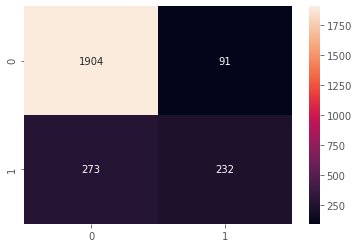

In [45]:
rf_cm = confusion_matrix(Y_test, rf_Y_pred)
sns.heatmap(rf_cm, annot= True,fmt='g')

<i> Classification Report </i>

In [46]:
print(classification_report(Y_test, rf_Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1995
           1       0.72      0.46      0.56       505

    accuracy                           0.85      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



<i> Area Under Curve </i>

In [47]:
rf_area_under_curve = roc_auc_score(Y_test, rf_classifier.predict(X_test))

print(rf_area_under_curve)

0.70689595275317


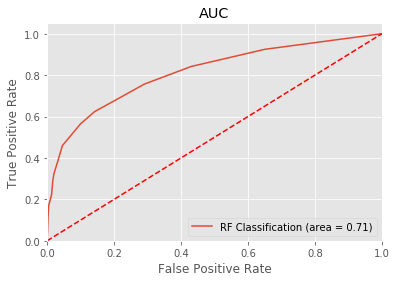

In [48]:
fpr, tpr, thresholds = roc_curve(Y_test, rf_classifier.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='RF Classification (area = %0.2f)' % rf_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.legend(loc="lower right")
plt.show()

#### Model 1: Random Forest Feature Selection

<i> Forward Selection </i>

In [49]:
rf_sfs = SFS(rf_classifier, 
          k_features='best', 
          forward=True, 
          scoring='recall', 
          cv=10)

In [50]:
rf_sfs = rf_sfs.fit(X_train, Y_train)

In [51]:
rf_sfs.k_feature_names_

('0', '1', '3', '4', '6', '9', '12')

In [52]:
print('\nSelected feature indices:', rf_sfs.k_feature_idx_)
print('CV Score:', rf_sfs.k_score_)


Selected feature indices: (0, 1, 3, 4, 6, 9, 12)
CV Score: 0.5169722434428317


In [53]:
pd.DataFrame.from_dict(rf_sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.20261437908496732, 0.2549019607843137, 0.27...",0.219298,"(1,)",0.0267934,0.036075,0.012025
2,"(1, 4)","[0.45751633986928103, 0.477124183006536, 0.464...",0.435994,"(1, 4)",0.0279371,0.0376149,0.0125383
3,"(1, 3, 4)","[0.5163398692810458, 0.43790849673202614, 0.41...",0.441902,"(1, 3, 4)",0.0222975,0.0300218,0.0100073
4,"(1, 3, 4, 9)","[0.5751633986928104, 0.46405228758169936, 0.45...",0.483007,"(1, 3, 4, 9)",0.0315456,0.0424734,0.0141578
5,"(1, 3, 4, 6, 9)","[0.6078431372549019, 0.5098039215686274, 0.470...",0.505229,"(1, 3, 4, 6, 9)",0.0299779,0.0403627,0.0134542
6,"(1, 3, 4, 6, 9, 12)","[0.6143790849673203, 0.5098039215686274, 0.457...",0.515644,"(1, 3, 4, 6, 9, 12)",0.0309324,0.0416478,0.0138826
7,"(0, 1, 3, 4, 6, 9, 12)","[0.5686274509803921, 0.5294117647058824, 0.470...",0.516972,"(0, 1, 3, 4, 6, 9, 12)",0.0241426,0.032506,0.0108353
8,"(0, 1, 3, 4, 5, 6, 9, 12)","[0.5294117647058824, 0.49019607843137253, 0.47...",0.49806,"(0, 1, 3, 4, 5, 6, 9, 12)",0.0241695,0.0325421,0.0108474
9,"(0, 1, 3, 4, 5, 6, 9, 11, 12)","[0.5620915032679739, 0.49019607843137253, 0.45...",0.50522,"(0, 1, 3, 4, 5, 6, 9, 11, 12)",0.0279359,0.0376133,0.0125378
10,"(0, 1, 3, 4, 5, 6, 9, 10, 11, 12)","[0.5294117647058824, 0.5228758169934641, 0.490...",0.498723,"(0, 1, 3, 4, 5, 6, 9, 10, 11, 12)",0.019432,0.0261636,0.0087212


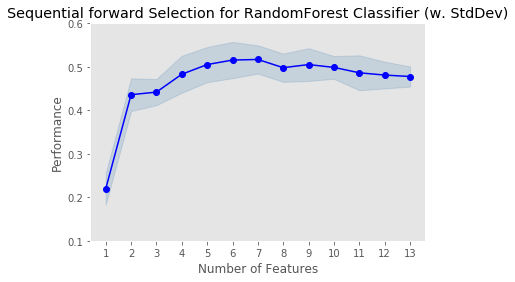

In [54]:
fig1 = plot_sfs(rf_sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.1, 0.6])
plt.title('Sequential forward Selection for RandomForest Classifier (w. StdDev)')
plt.grid()
plt.show()

#### Model 2: XGBoost Train-Test

In [55]:
xgb = xgb.XGBClassifier(random_state = 15)

model = xgb.fit(X_train, Y_train)
result = model.predict(X_test)

#### Model 2: XGBoost Evaluation

<i>GridSearchCV</i>

In [56]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 15,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [57]:
xgb_param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.9, 1, 1.1],
    'reg_lambda': [120, 130, 140],
     'scale_pos_weight': [x]
}

In [58]:
xgb_optimal_params = GridSearchCV(
                    estimator = xgb,  
                    param_grid = xgb_param_grid,
                    scoring = 'recall',
                    verbose = 0, 
                    cv = 3
)

xgb_optimal_params.fit(X_train, 
                   Y_train, 
                   early_stopping_rounds=10,   
                   eval_set=[(X_test, Y_test)], 
                   verbose=False)

print(xgb_optimal_params.best_params_)

{'learning_rate': 1, 'max_depth': 5, 'reg_lambda': 130, 'scale_pos_weight': 3.9091801669121256}


<i> Confusion Matrix </i>

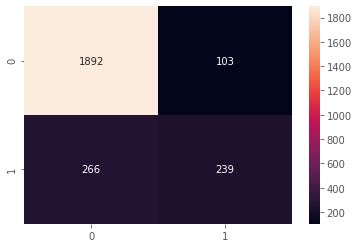

In [59]:
xgb_cm = confusion_matrix(Y_test, result)
sns.heatmap(xgb_cm, annot= True,fmt='g')

<i> Classification Report </i>

In [60]:
print(classification_report(Y_test, result))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1995
           1       0.70      0.47      0.56       505

    accuracy                           0.85      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



<i> Area Under Curve </i>

In [61]:
xgb_area_under_curve = roc_auc_score(Y_test, xgb.predict(X_test))

print(xgb_area_under_curve)

0.7108191270254846


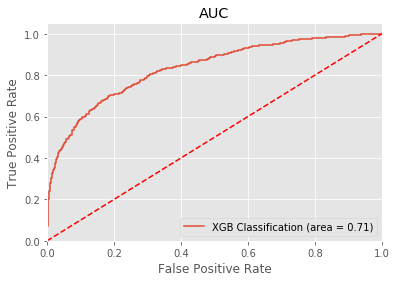

In [62]:
fpr, tpr, thresholds = roc_curve(Y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='XGB Classification (area = %0.2f)' % xgb_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.legend(loc="lower right")
plt.show()

#### Model 2: XGBoost Feature Selection

<i> Forward Selection </i>

In [63]:
xgb_sfs = SFS(xgb, 
          k_features='best', 
          forward=True, 
          scoring='recall',
          cv=10)

In [64]:
xgb_sfs = xgb_sfs.fit(X_train, Y_train)

In [65]:
xgb_sfs.k_feature_names_

('0', '1', '3', '4', '6', '8', '9', '10', '11')

In [66]:
print('\nSelected feature indices:', xgb_sfs.k_feature_idx_)
print('CV Score:', xgb_sfs.k_score_)


Selected feature indices: (0, 1, 3, 4, 6, 8, 9, 10, 11)
CV Score: 0.5072022748493337


In [67]:
pd.DataFrame.from_dict(xgb_sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.20261437908496732, 0.24836601307189543, 0.3...",0.210207,"(1,)",0.0313333,0.0421877,0.0140626
2,"(1, 4)","[0.45751633986928103, 0.49019607843137253, 0.4...",0.434051,"(1, 4)",0.0302861,0.0407776,0.0135925
3,"(1, 4, 8)","[0.49673202614379086, 0.4444444444444444, 0.45...",0.446431,"(1, 4, 8)",0.0273746,0.0368575,0.0122858
4,"(1, 4, 8, 9)","[0.5228758169934641, 0.49673202614379086, 0.48...",0.456918,"(1, 4, 8, 9)",0.0249118,0.0335417,0.0111806
5,"(1, 4, 6, 8, 9)","[0.5098039215686274, 0.477124183006536, 0.4509...",0.459549,"(1, 4, 6, 8, 9)",0.0241637,0.0325343,0.0108448
6,"(1, 3, 4, 6, 8, 9)","[0.5424836601307189, 0.5228758169934641, 0.437...",0.486954,"(1, 3, 4, 6, 8, 9)",0.0259382,0.0349235,0.0116412
7,"(1, 3, 4, 6, 8, 9, 11)","[0.5490196078431373, 0.5032679738562091, 0.450...",0.492148,"(1, 3, 4, 6, 8, 9, 11)",0.0253876,0.0341823,0.0113941
8,"(0, 1, 3, 4, 6, 8, 9, 11)","[0.5555555555555556, 0.5098039215686274, 0.483...",0.501303,"(0, 1, 3, 4, 6, 8, 9, 11)",0.0222738,0.0299898,0.0099966
9,"(0, 1, 3, 4, 6, 8, 9, 10, 11)","[0.5490196078431373, 0.5163398692810458, 0.477...",0.507202,"(0, 1, 3, 4, 6, 8, 9, 10, 11)",0.0236141,0.0317943,0.0105981
10,"(0, 1, 3, 4, 6, 8, 9, 10, 11, 12)","[0.5490196078431373, 0.5163398692810458, 0.477...",0.507202,"(0, 1, 3, 4, 6, 8, 9, 10, 11, 12)",0.0236141,0.0317943,0.0105981


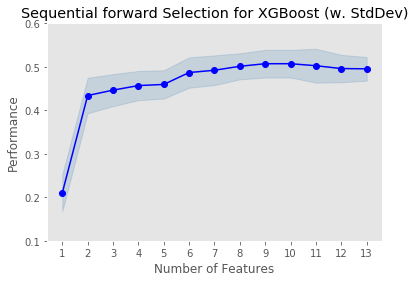

In [68]:
fig2 = plot_sfs(xgb_sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.1, 0.6])
plt.title('Sequential forward Selection for XGBoost (w. StdDev)')
plt.grid()
plt.show()

#### Model 3: K-Nearest Neighbours (KNN) Train-Test

In [69]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 2) 

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [70]:
knn_y_pred = knn.predict(X_test)

#### Model 3: K-Nearest Neighbours (KNN) Evaluation

<i>GridSearchCV</i>

In [71]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [72]:
knn_param_grid = {
    'leaf_size': [20, 30, 40],
    'n_jobs': [1, 2, 3],
    'n_neighbors': [5, 7, 10],
    'p': [2, 5, 10]
    
}

knn_grid_model = GridSearchCV(estimator= knn, param_grid = knn_param_grid , scoring = 'recall', cv=3 , verbose= 1)

knn_grid_model.fit(X_train, Y_train)

knn_grid_model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:  4.1min finished


{'leaf_size': 20, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2}

<i> Confusion Matrix </i>

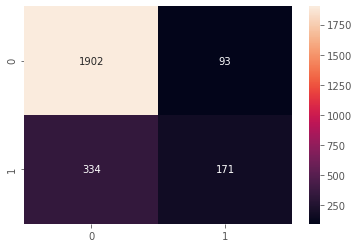

In [73]:
knn_cm = confusion_matrix(Y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='g')

<i> Classification Report </i>

In [74]:
print(classification_report(Y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1995
           1       0.65      0.34      0.44       505

    accuracy                           0.83      2500
   macro avg       0.75      0.65      0.67      2500
weighted avg       0.81      0.83      0.81      2500



<i> Area Under Curve </i>

In [75]:
knn_area_under_curve = roc_auc_score(Y_test, knn.predict(X_test))

print(knn_area_under_curve)

0.6459986600163776


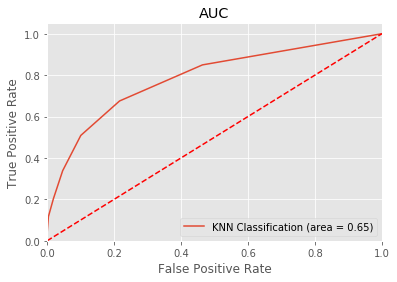

In [76]:
fpr, tpr, thresholds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='KNN Classification (area = %0.2f)' % knn_area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.legend(loc="lower right")
plt.show()

#### Model 3: K-Nearest Neighbours (KNN) Feature Selection

<i> Forward Selection </i>


Selected feature indices: (1, 3, 4, 6, 8, 9, 10)
CV Score: 0.5026398438163143


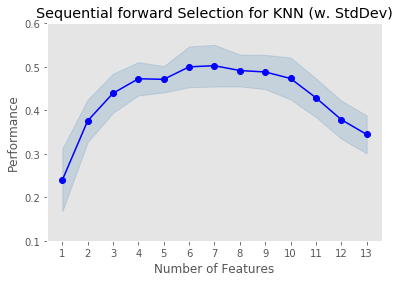

In [77]:
knn_sfs = SFS(knn, 
          k_features='best', 
          forward=True, 
          scoring='recall',
          cv=10)

knn_sfs = knn_sfs.fit(X_train, Y_train)
knn_sfs.k_feature_names_

print('\nSelected feature indices:', knn_sfs.k_feature_idx_)
print('CV Score:', knn_sfs.k_score_)

pd.DataFrame.from_dict(knn_sfs.get_metric_dict()).T

fig3 = plot_sfs(knn_sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.1, 0.6])
plt.title('Sequential forward Selection for KNN (w. StdDev)')
plt.grid()
plt.show()